# importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pds
import seaborn as sns

## Data preprocessing
## Training Image Preprocessing



In [3]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/mahim/Plant_Disease_Dataset/Plant_disease/train/train_dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 68416 files belonging to 38 classes.


In [25]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'C:/Users/mahim/Plant_Disease_Dataset/Plant_disease/valid/valid_dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


# building model


In [26]:
cnn = tf.keras.models.Sequential()

In [27]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [28]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [29]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [30]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [31]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [32]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [33]:
cnn.add(tf.keras.layers.Flatten())

In [34]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [35]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [36]:
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [37]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])


In [38]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [39]:
!nvidia-smi

Sun Jul 20 14:46:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 576.88                 Driver Version: 576.88         CUDA Version: 12.9     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   60C    P8              8W /   50W |    2299MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Training model

In [53]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=4)

Epoch 1/4
2138/2138 [==============================] - 242s 113ms/step - loss: 0.7335 - accuracy: 0.7710 - val_loss: 0.4882 - val_accuracy: 0.8504
Epoch 2/4
2138/2138 [==============================] - 246s 115ms/step - loss: 0.3536 - accuracy: 0.8868 - val_loss: 0.2814 - val_accuracy: 0.9112
Epoch 3/4
2138/2138 [==============================] - 255s 119ms/step - loss: 0.2289 - accuracy: 0.9263 - val_loss: 0.2438 - val_accuracy: 0.9221
Epoch 4/4
2138/2138 [==============================] - 259s 121ms/step - loss: 0.1634 - accuracy: 0.9470 - val_loss: 0.3207 - val_accuracy: 0.8963


## MODEL EVALUATION ON TRAINING SET

In [59]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2138/2138 [==============================] - 142s 66ms/step - loss: 0.1673 - accuracy: 0.9429
Training accuracy: 0.9428788423538208


In [41]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 59s 106ms/step - loss: 3.9922 - accuracy: 0.0252
Validation accuracy: 0.025210563093423843


In [42]:
print(val_loss,val_acc)

3.9921622276306152 0.025210563093423843


In [60]:
cnn.save('trained_model.keras')

In [61]:
training_history.history['accuracy'] #Return Dictionary of history

[0.7709600329399109,
 0.8868393301963806,
 0.9263330101966858,
 0.9470006823539734]

In [62]:
import json
with open('training_hist.json','w') as f:
 json.dump(training_history.history,f)

In [63]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


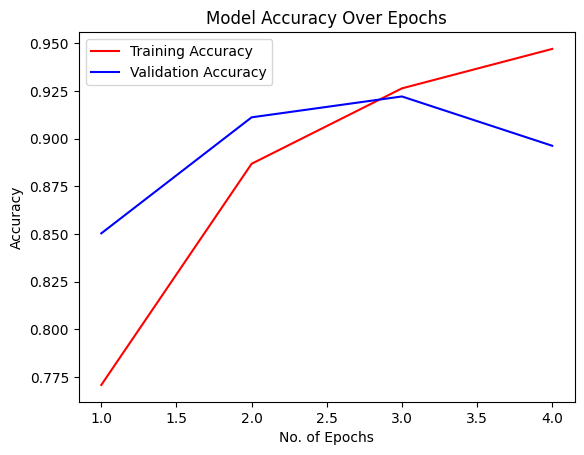

In [64]:


# Fix epochs to match the training history
epochs = [i for i in range(1,5)]

# Plot accuracy
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.show()


 ## Some other metrics for model evaluation
 

In [65]:
class_name = validation_set.class_names


In [66]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid/valid_dataset',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [67]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 [==============================] - 98s 6ms/step


In [68]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [69]:
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [70]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [71]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [73]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.71      0.97      0.82       504
                                 Apple___Black_rot       0.98      0.88      0.93       497
                          Apple___Cedar_apple_rust       0.96      0.88      0.92       440
                                   Apple___healthy       1.00      0.09      0.16       502
                               Blueberry___healthy       0.82      0.99      0.90       454
          Cherry_(including_sour)___Powdery_mildew       0.95      0.96      0.96       421
                 Cherry_(including_sour)___healthy       0.90      1.00      0.95       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.80      0.87       410
                       Corn_(maize)___Common_rust_       0.97      0.99      0.98       477
               Corn_(maize)___Northern_Leaf_Blight       0.84      0.99      0.

# confusion Matrix Visualization 

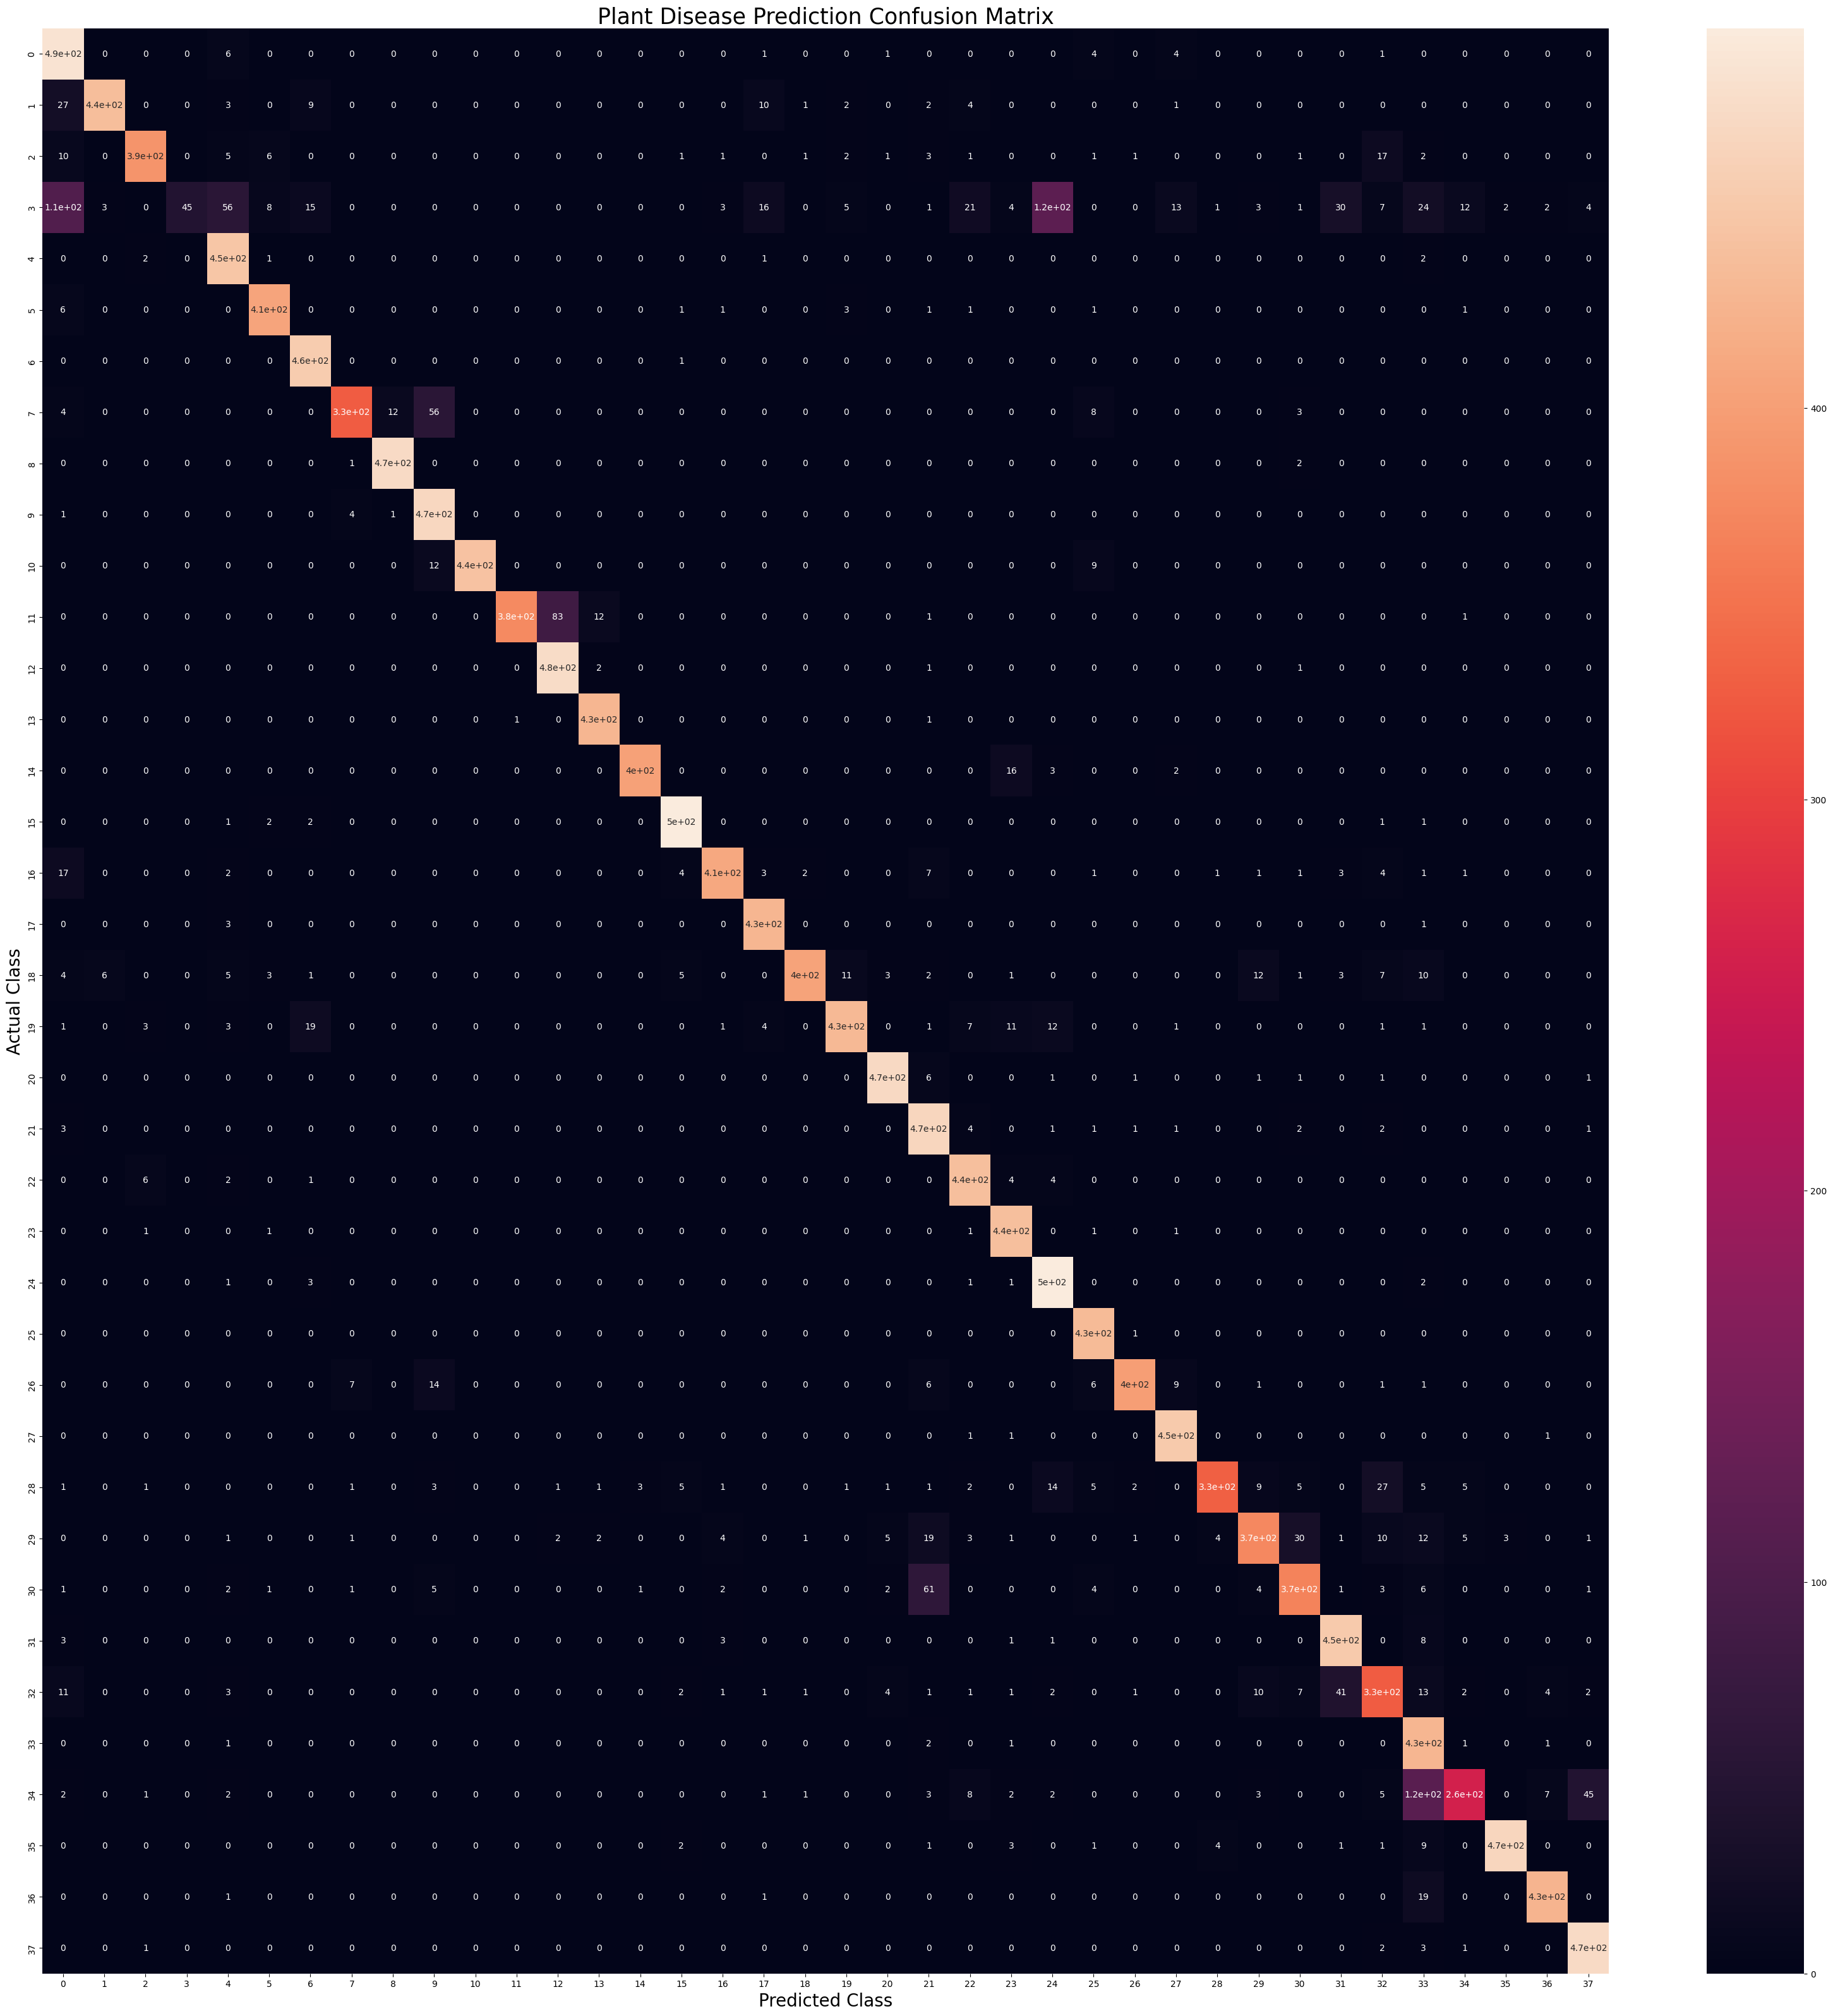

In [72]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()